In [26]:
from sympy import symbols, inverse_laplace_transform, apart, Heaviside, laplace_transform
import sympy as sp

s, t, a = symbols('s t a')
F = 2 / ((s + 1) * (s + 2)**2)
F1 = 1 / (s-a)
# Perform partial fraction decomposition if necessary
F_apart = apart(F)

# Compute the inverse Laplace transform
f = inverse_laplace_transform(F_apart, s, t)
f.simplify()

2*(-t + exp(t) - 1)*exp(-2*t)*Heaviside(t)

In [32]:
val = inverse_laplace_transform(F1, s, t)
val


exp(a*t)*Heaviside(t)

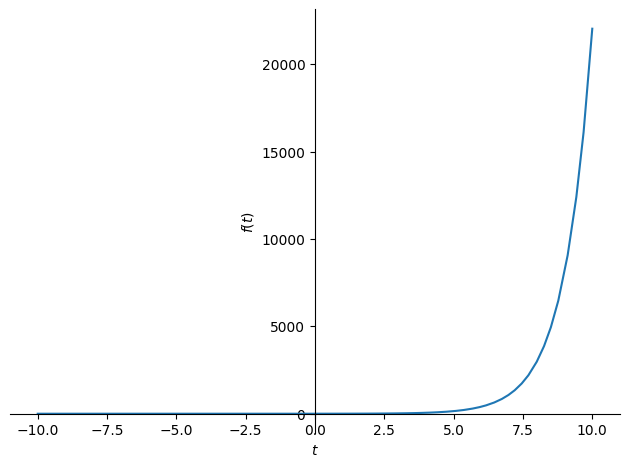

In [33]:
sp.plot(val.subs({a:1}))

In [21]:
laplace_transform(f, t, s)[0]

1/(s + 1)